<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-2-Kaggle-Challenge/blob/master/module2/Jonathan_Mendoza_assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_






### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module2')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 85, done.
remote: Total 85 (delta 0), reused 0 (delta 0), pack-reused 85
Unpacking objects: 100% (85/85), done.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 112kB 8.9MB/s 
     |████████████████████████████████| 133kB 53.3MB/s 
     |████████████████████████████████| 57.7MB 1.3MB/s 
     |████████████████████████████████| 245kB 28.9MB/s 
     |████████████████████████████████| 614kB 41.2MB/s 
     |████████████████████████████████| 225kB 22.4MB/s 
     |████████████████████████████████| 768kB 40.3MB/s 
     |████████████████████████████████| 51kB 15.8MB/s 
     |████████████████████████████████| 194kB 52.1MB/s 
     |████████████████████████████████| 737kB 53.1MB/s 
     |███████████████████████████████

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

In [3]:
train, val = train_test_split(train, train_size=0.8, test_size = 0.2,
                              stratify = train['status_group'])
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [4]:
numeric_cols = train.select_dtypes('number').columns.tolist()
for col in range(len(numeric_cols)): #check how many zeros are in each column
  print('\n',numeric_cols[col],'\n',train.query(f'{numeric_cols[col]}==0').shape)


 id 
 (1, 41)

 amount_tsh 
 (33285, 41)

 gps_height 
 (16322, 41)

 longitude 
 (1460, 41)

 latitude 
 (0, 41)

 num_private 
 (46934, 41)

 region_code 
 (0, 41)

 district_code 
 (14, 41)

 population 
 (17095, 41)

 construction_year 
 (16556, 41)


In [0]:
def wrangle(X):
  """Wrangle a given dataset"""
  import numpy as np
  import datetime

  X = X.copy()

  X['date_recorded'] = pd.to_datetime(X['date_recorded'],infer_datetime_format=True)

  
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  zero_cols = ['latitude','longitude','construction_year','gps_height','district_code','population']

  for col in zero_cols:
    X[col] = X[col].replace(0,np.nan)
    X[col+'_MISSING'] = X[col].isnull().astype('int')


  X['years_since_inspection'] = X['date_recorded'].dt.year-X['construction_year']

  X = X.drop(columns = ['recorded_by','num_private','quantity_group','scheme_name','extraction_type_group','payment','source','waterpoint_type'])

  return X

In [6]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape,val.shape,test.shape

((47520, 40), (11880, 40), (14358, 39))

In [7]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,latitude_MISSING,longitude_MISSING,construction_year_MISSING,gps_height_MISSING,district_code_MISSING,population_MISSING,years_since_inspection
35926,6637,0.0,2011-03-08,Government Of Tanzania,155.0,DWE,38.680470,-5.178488,Mdundiko,Pangani,Msowelo Kati,Tanga,4,3.0,Muheza,Bwembera,483.0,True,VWC,False,1983.0,afridev,handpump,vwc,user-group,never pay,salty,salty,insufficient,shallow well,groundwater,hand pump,functional,0,0,0,0,0,0,28.0
19332,48733,0.0,2011-03-30,NaN,NaN,NaN,33.917055,-9.405001,Lufilyo A,Lake Nyasa,Lufilyo,Mbeya,12,4.0,Rungwe,Kisegese,NaN,True,Water authority,NaN,NaN,gravity,gravity,water authority,commercial,unknown,soft,good,enough,river/lake,surface,communal standpipe,non functional,0,0,1,1,0,1,NaN
48064,25841,30.0,2011-02-28,Government Of Tanzania,8.0,Centr,38.300271,-7.792051,Juma Athmani Makuka,Rufiji,Mibuyu Saba,Pwani,60,53.0,Rufiji,Mwaseni,1.0,True,VWC,True,1968.0,mono,motorpump,vwc,user-group,never pay,soft,good,dry,borehole,groundwater,communal standpipe,non functional,0,0,0,0,0,0,43.0
50304,45522,500.0,2011-03-08,Dhv,259.0,DWE,36.681690,-8.264460,Kwa Makoti,Rufiji,Matindi,Morogoro,5,3.0,Ulanga,Minepa,500.0,True,NaN,True,1997.0,swn 80,handpump,vwc,user-group,monthly,soft,good,enough,shallow well,groundwater,hand pump,functional,0,0,0,0,0,0,14.0
857,56631,50.0,2013-03-20,0,15.0,0,39.219962,-6.916499,Mzinga Ccm,Wami / Ruvu,Mtaa Wa Mzinga,Dar es Salaam,7,2.0,Ilala,Kitunda,150.0,NaN,WUG,False,2000.0,india mark ii,handpump,wug,user-group,per bucket,soft,good,enough,borehole,groundwater,hand pump,functional,0,0,0,0,0,0,13.0


In [8]:
target = 'status_group'

train_features = train.drop(columns=[target,'id'])

numeric = train_features.select_dtypes(include = 'number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical = cardinality[cardinality<=21].index.tolist()

features = numeric + categorical

features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'latitude_MISSING',
 'longitude_MISSING',
 'construction_year_MISSING',
 'gps_height_MISSING',
 'district_code_MISSING',
 'population_MISSING',
 'years_since_inspection',
 'basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type_group']

In [0]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

In [22]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(n_estimators = 5, random_state = 42, n_jobs = -1)
)

pipeline.fit(X_train,y_train)
print('Validation Accuracy', pipeline.score(X_val,y_val))

Validation Accuracy 0.7821548821548822


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

rf = pipeline.named_steps['randomforestclassifier']

encoder = pipeline.named_steps['onehotencoder']

encoded = encoder.transform(X_train)

importances = pd.Series(rf.feature_importances_, encoded.columns)
importances

amount_tsh                                  0.015200
gps_height                                  0.067374
longitude                                   0.142057
latitude                                    0.138998
region_code                                 0.015481
district_code                               0.022443
population                                  0.041656
construction_year                           0.039251
latitude_MISSING                            0.001104
longitude_MISSING                           0.001475
construction_year_MISSING                   0.002312
gps_height_MISSING                          0.002690
district_code_MISSING                       0.000113
population_MISSING                          0.003595
years_since_inspection                      0.038386
basin_Pangani                               0.002256
basin_Lake Nyasa                            0.002039
basin_Rufiji                                0.002469
basin_Wami / Ruvu                           0.

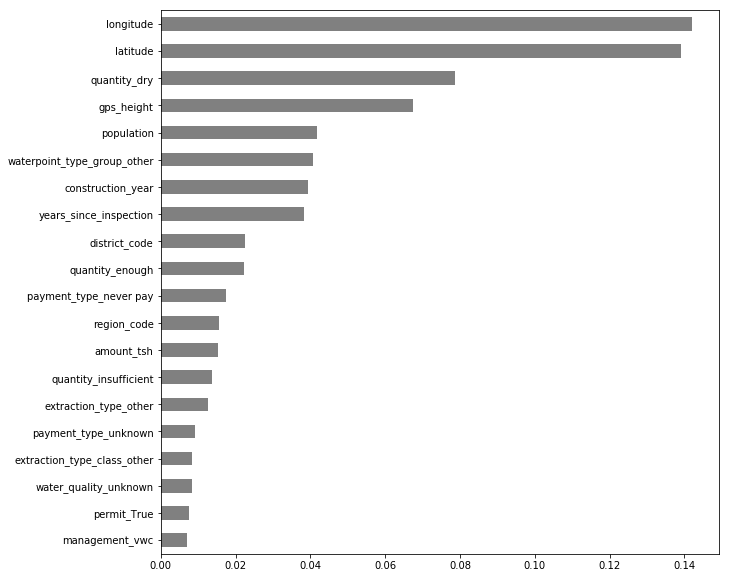

In [24]:
n = 20

plt.figure(figsize = (10,10))

importances.sort_values()[-n:].plot.barh(color = 'grey')

In [26]:
y_pred = pipeline.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('tanzania_submission-03.csv', index = False)

!head tanzania_submission-03.csv

if in_colab:
  from google.colab import files
  files.download('tanzania_submission-03.csv')

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional
